In [34]:
# ===========================
# Cell 1: 導入套件
# ===========================
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 確保已安裝所需套件
required_packages = {
    'pandas': pd,
    'numpy': np,
    'matplotlib': matplotlib,
    'seaborn': sns,
}

print("檢查套件安裝狀態...")
for package_name, package in required_packages.items():
    try:
        print(f"✅ {package_name} 版本: {package.__version__}")
    except:
        print(f"❌ {package_name} 未安裝")

檢查套件安裝狀態...
✅ pandas 版本: 1.5.3
✅ numpy 版本: 1.24.4
✅ matplotlib 版本: 3.10.3
✅ seaborn 版本: 0.13.2


In [35]:
# ===========================
# Cell 2: 導入機器學習相關套件
# ===========================
try:
    # Scikit-learn
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
    print("✅ Scikit-learn 套件載入成功")
except ImportError as e:
    print(f"❌ Scikit-learn 載入失敗: {e}")

try:
    # 處理不平衡資料
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.combine import SMOTEENN
    print("✅ Imbalanced-learn 套件載入成功")
except ImportError:
    print("❌ Imbalanced-learn 未安裝，請執行: pip install imbalanced-learn")

try:
    # GPU加速的模型
    import xgboost as xgb
    print(f"✅ XGBoost 版本: {xgb.__version__}")
except ImportError:
    print("❌ XGBoost 未安裝，請執行: pip install xgboost")

try:
    import lightgbm as lgb
    print(f"✅ LightGBM 版本: {lgb.__version__}")
except ImportError:
    print("❌ LightGBM 未安裝，請執行: pip install lightgbm")

try:
    from catboost import CatBoostClassifier
    print("✅ CatBoost 載入成功")
except ImportError:
    print("❌ CatBoost 未安裝，請執行: pip install catboost")

try:
    # PyTorch
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import DataLoader, TensorDataset
    print(f"✅ PyTorch 版本: {torch.__version__}")
    print(f"   CUDA 可用: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"   GPU: {torch.cuda.get_device_name(0)}")
except ImportError:
    print("❌ PyTorch 未安裝，請參考 https://pytorch.org 安裝")

# 其他工具
import joblib
import os
import time

✅ Scikit-learn 套件載入成功
✅ Imbalanced-learn 套件載入成功
✅ XGBoost 版本: 3.0.2
✅ LightGBM 版本: 4.3.0
✅ CatBoost 載入成功
✅ PyTorch 版本: 2.7.0+cu118
   CUDA 可用: True
   GPU: NVIDIA GeForce RTX 3090


In [36]:
# ===========================
# Cell 3: 載入資料
# ===========================
def load_data(file_path):
    """載入資料並顯示基本資訊"""
    print(f"正在載入資料: {file_path}")
    
    try:
        # 先檢查檔案是否存在
        if not os.path.exists(file_path):
            print(f"❌ 錯誤: 找不到檔案 {file_path}")
            return None
            
        # 載入資料
        df = pd.read_csv(file_path, low_memory=False)
        print(f"✅ 資料載入成功!")
        print(f"   資料集大小: {df.shape}")
        print(f"   記憶體使用: {df.memory_usage().sum() / 1024**2:.2f} MB")
        
        # 顯示前幾筆資料
        print("\n前5筆資料:")
        print(df.head())
        
        # 顯示欄位資訊
        print(f"\n欄位總數: {len(df.columns)}")
        print("欄位列表:")
        for i, col in enumerate(df.columns):
            if i < 10:  # 只顯示前10個
                print(f"   {i+1}. {col}")
        print("   ...")
        
        return df
        
    except Exception as e:
        print(f"❌ 載入資料時發生錯誤: {e}")
        return None

# 執行載入 (請修改為你的檔案路徑)
file_path = 'us-accidents/US_Accidents_March23.csv'
df = load_data(file_path)

正在載入資料: us-accidents/US_Accidents_March23.csv
✅ 資料載入成功!
   資料集大小: (7728394, 46)
   記憶體使用: 2041.59 MB

前5筆資料:
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   S

In [37]:
# ===========================
# Cell 4: 資料基本探索
# ===========================
if df is not None:
    print("=== 資料基本統計 ===")
    print(f"\n目標變數 (Severity) 分布:")
    print(df['Severity'].value_counts().sort_index())
    
    # 檢查資料型態
    print("\n資料型態統計:")
    print(df.dtypes.value_counts())
    
    # 數值型欄位統計
    print("\n數值型欄位描述統計:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"數值型欄位數量: {len(numeric_cols)}")
    
    # 檢查缺失值
    print("\n缺失值概覽:")
    missing_summary = df.isnull().sum()
    missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
    print(f"有缺失值的欄位數: {len(missing_summary)}")
    print(missing_summary.head(10))

=== 資料基本統計 ===

目標變數 (Severity) 分布:
1      67366
2    6156981
3    1299337
4     204710
Name: Severity, dtype: int64

資料型態統計:
object     20
bool       13
float64    12
int64       1
dtype: int64

數值型欄位描述統計:
數值型欄位數量: 13

缺失值概覽:
有缺失值的欄位數: 22
End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
dtype: int64


In [38]:
# ===========================
# Cell 5: 日期時間處理函數
# ===========================
def process_datetime_columns(df):
    """處理日期時間欄位"""
    if df is None:
        print("❌ 資料框為空")
        return None
        
    print("\n=== 處理日期時間欄位 ===")
    df_copy = df.copy()  # 避免修改原始資料
    
    # 日期時間欄位
    date_columns = ['Start_Time', 'End_Time', 'Weather_Timestamp']
    
    for col in date_columns:
        if col in df_copy.columns:
            print(f"\n處理 {col}...")
            
            # 顯示原始資料範例
            print(f"原始資料範例: {df_copy[col].iloc[0]}")
            
            # 轉換為日期時間
            df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')
            
            # 檢查轉換結果
            null_count = df_copy[col].isnull().sum()
            if null_count > 0:
                print(f"⚠️  警告: {col} 有 {null_count} 筆無法解析的日期")
            else:
                print(f"✅ {col} 轉換成功")
                print(f"   日期範圍: {df_copy[col].min()} 到 {df_copy[col].max()}")
    
    # 計算持續時間
    if 'Start_Time' in df_copy.columns and 'End_Time' in df_copy.columns:
        print("\n計算事故持續時間...")
        df_copy['Duration_minutes'] = (df_copy['End_Time'] - df_copy['Start_Time']).dt.total_seconds() / 60
        
        # 顯示統計
        print(f"持續時間統計:")
        print(f"  最小值: {df_copy['Duration_minutes'].min():.2f} 分鐘")
        print(f"  最大值: {df_copy['Duration_minutes'].max():.2f} 分鐘") 
        print(f"  平均值: {df_copy['Duration_minutes'].mean():.2f} 分鐘")
        print(f"  中位數: {df_copy['Duration_minutes'].median():.2f} 分鐘")
        
        # 過濾異常值
        original_len = len(df_copy)
        df_copy = df_copy[(df_copy['Duration_minutes'] > 0) & (df_copy['Duration_minutes'] < 1440)]
        filtered_len = len(df_copy)
        print(f"\n過濾異常持續時間: {original_len} → {filtered_len} (移除 {original_len - filtered_len} 筆)")
    
    print(f"\n處理後資料大小: {df_copy.shape}")
    return df_copy

# 執行日期處理
df_processed = process_datetime_columns(df)


=== 處理日期時間欄位 ===

處理 Start_Time...
原始資料範例: 2016-02-08 05:46:00
✅ Start_Time 轉換成功
   日期範圍: 2016-01-14 20:18:33 到 2023-03-31 23:30:00

處理 End_Time...
原始資料範例: 2016-02-08 11:00:00
✅ End_Time 轉換成功
   日期範圍: 2016-02-08 06:37:08 到 2023-03-31 23:59:00

處理 Weather_Timestamp...
原始資料範例: 2016-02-08 05:58:00
⚠️  警告: Weather_Timestamp 有 120228 筆無法解析的日期

計算事故持續時間...
持續時間統計:
  最小值: 1.22 分鐘
  最大值: 2812939.00 分鐘
  平均值: 444.42 分鐘
  中位數: 74.83 分鐘

過濾異常持續時間: 7728394 → 7693248 (移除 35146 筆)

處理後資料大小: (7693248, 47)


In [39]:
# ===========================
# Cell 6: 特徵工程
# ===========================
def feature_engineering(df):
    """創建新特徵"""
    if df is None:
        print("❌ 資料框為空")
        return None
        
    print("\n=== 執行特徵工程 ===")
    df_copy = df.copy()
    
    # 時間相關特徵
    if 'Start_Time' in df_copy.columns:
        # 確保Start_Time不為null
        df_copy = df_copy[df_copy['Start_Time'].notna()]
        print(f"移除Start_Time為null的記錄後: {len(df_copy)} 筆")
        
        # 提取時間特徵
        print("創建時間特徵...")
        df_copy['Hour'] = df_copy['Start_Time'].dt.hour
        df_copy['DayOfWeek'] = df_copy['Start_Time'].dt.dayofweek
        df_copy['Month'] = df_copy['Start_Time'].dt.month
        df_copy['Year'] = df_copy['Start_Time'].dt.year
        df_copy['IsWeekend'] = (df_copy['DayOfWeek'] >= 5).astype(int)
        
        # 時段分類
        df_copy['TimeOfDay'] = pd.cut(df_copy['Hour'], 
                                      bins=[-1, 6, 12, 18, 24], 
                                      labels=['Night', 'Morning', 'Afternoon', 'Evening'])
        
        # 季節
        df_copy['Season'] = pd.cut(df_copy['Month'], 
                                   bins=[0, 3, 6, 9, 12], 
                                   labels=['Winter', 'Spring', 'Summer', 'Fall'])
        
        print("✅ 時間特徵創建完成")
    
    # 天氣條件簡化
    if 'Weather_Condition' in df_copy.columns:
        print("\n處理天氣條件...")
        
        weather_keywords = {
            'Clear': ['Clear', 'Fair'],
            'Cloudy': ['Cloud', 'Overcast'],
            'Rain': ['Rain', 'Drizzle', 'Shower'],
            'Snow': ['Snow', 'Sleet', 'Hail'],
            'Fog': ['Fog', 'Mist'],
            'Storm': ['Storm', 'Thunder']
        }
        
        def categorize_weather(condition):
            if pd.isna(condition):
                return 'Unknown'
            condition = str(condition)
            for category, keywords in weather_keywords.items():
                if any(keyword in condition for keyword in keywords):
                    return category
            return 'Other'
        
        df_copy['Weather_Category'] = df_copy['Weather_Condition'].apply(categorize_weather)
        
        # 顯示天氣分類結果
        print("天氣類別分布:")
        print(df_copy['Weather_Category'].value_counts())
    
    print(f"\n特徵工程完成，資料大小: {df_copy.shape}")
    return df_copy

# 執行特徵工程
df_featured = feature_engineering(df_processed)


=== 執行特徵工程 ===
移除Start_Time為null的記錄後: 7693248 筆
創建時間特徵...
✅ 時間特徵創建完成

處理天氣條件...
天氣類別分布:
Clear      3387476
Cloudy     3151763
Rain        538814
Unknown     172571
Snow        159950
Fog         111292
Other       106466
Storm        64916
Name: Weather_Category, dtype: int64

特徵工程完成，資料大小: (7693248, 55)


In [40]:
# ===========================
# Cell 7: 缺失值處理
# ===========================
def handle_missing_values(df, missing_threshold=60):
    """處理缺失值"""
    if df is None:
        print("❌ 資料框為空")
        return None
        
    print(f"\n=== 處理缺失值 (閾值: {missing_threshold}%) ===")
    df_copy = df.copy()
    
    # 計算缺失值百分比
    missing_percentage = (df_copy.isnull().sum() / len(df_copy)) * 100
    
    # 找出高缺失率欄位
    high_missing_cols = missing_percentage[missing_percentage > missing_threshold].index.tolist()
    
    if len(high_missing_cols) > 0:
        print(f"\n刪除高缺失率欄位 ({len(high_missing_cols)} 個):")
        for col in high_missing_cols[:10]:  # 顯示前10個
            print(f"  - {col}: {missing_percentage[col]:.1f}%")
        if len(high_missing_cols) > 10:
            print(f"  ... 還有 {len(high_missing_cols) - 10} 個欄位")
        
        df_copy = df_copy.drop(columns=high_missing_cols)
    
    # 填補剩餘缺失值
    print("\n填補剩餘缺失值...")
    
    # 數值型欄位用中位數填補
    numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_copy[col].isnull().sum() > 0:
            median_value = df_copy[col].median()
            df_copy[col].fillna(median_value, inplace=True)
            print(f"  {col}: 用中位數 {median_value:.2f} 填補")
    
    # 類別型欄位用眾數填補
    categorical_cols = df_copy.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_copy[col].isnull().sum() > 0:
            mode_value = df_copy[col].mode()[0] if len(df_copy[col].mode()) > 0 else 'Unknown'
            df_copy[col].fillna(mode_value, inplace=True)
            print(f"  {col}: 用眾數 '{mode_value}' 填補")
    
    print(f"\n處理後資料大小: {df_copy.shape}")
    print(f"剩餘缺失值總數: {df_copy.isnull().sum().sum()}")
    
    return df_copy

# 執行缺失值處理
df_cleaned = handle_missing_values(df_featured, missing_threshold=60)


=== 處理缺失值 (閾值: 60%) ===

填補剩餘缺失值...
  End_Lat: 用中位數 36.20 填補
  End_Lng: 用中位數 -87.96 填補
  Temperature(F): 用中位數 64.00 填補
  Wind_Chill(F): 用中位數 62.00 填補
  Humidity(%): 用中位數 67.00 填補
  Pressure(in): 用中位數 29.86 填補
  Visibility(mi): 用中位數 10.00 填補
  Wind_Speed(mph): 用中位數 7.00 填補
  Precipitation(in): 用中位數 0.00 填補
  Description: 用眾數 'A crash has occurred causing no to minimum delays. Use caution.' 填補
  Street: 用眾數 'I-95 N' 填補
  City: 用眾數 'Miami' 填補
  Zipcode: 用眾數 '91761' 填補
  Timezone: 用眾數 'US/Eastern' 填補
  Airport_Code: 用眾數 'KCQT' 填補
  Wind_Direction: 用眾數 'CALM' 填補
  Weather_Condition: 用眾數 'Fair' 填補
  Sunrise_Sunset: 用眾數 'Day' 填補
  Civil_Twilight: 用眾數 'Day' 填補
  Nautical_Twilight: 用眾數 'Day' 填補
  Astronomical_Twilight: 用眾數 'Day' 填補

處理後資料大小: (7693248, 55)
剩餘缺失值總數: 119692


In [41]:
# ===========================
# Cell 8: 特徵選擇與編碼
# ===========================
def select_and_encode_features(df):
    """選擇特徵並進行編碼"""
    if df is None:
        print("❌ 資料框為空")
        return None, None, None
        
    print("\n=== 特徵選擇與編碼 ===")
    
    # 定義特徵類型
    numeric_features = [
        'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
        'Wind_Speed(mph)', 'Distance(mi)', 'Hour', 'DayOfWeek', 'Month', 
        'Year', 'IsWeekend'
    ]
    
    categorical_features = [
        'Side', 'State', 'Weather_Category', 'TimeOfDay', 'Season',
        'Sunrise_Sunset'
    ]
    
    boolean_features = [
        'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
        'Traffic_Signal'
    ]
    
    # 加入Duration_minutes如果存在
    if 'Duration_minutes' in df.columns:
        numeric_features.append('Duration_minutes')
    
    # 檢查並過濾存在的特徵
    print("\n檢查特徵存在性...")
    numeric_features = [f for f in numeric_features if f in df.columns]
    categorical_features = [f for f in categorical_features if f in df.columns]
    boolean_features = [f for f in boolean_features if f in df.columns]
    
    print(f"數值型特徵: {len(numeric_features)} 個")
    print(f"類別型特徵: {len(categorical_features)} 個")
    print(f"布林型特徵: {len(boolean_features)} 個")
    
    # 複製資料
    df_encoded = df.copy()
    
    # 處理布林特徵
    print("\n處理布林特徵...")
    for col in boolean_features:
        df_encoded[col] = df_encoded[col].astype(int)
    
    # 編碼類別特徵
    print("\n編碼類別特徵...")
    label_encoders = {}
    encoded_features = numeric_features + boolean_features
    
    for col in categorical_features:
        print(f"  編碼 {col}...")
        le = LabelEncoder()
        encoded_col_name = col + '_encoded'
        
        # 處理可能的null值
        df_encoded[col] = df_encoded[col].fillna('Unknown').astype(str)
        df_encoded[encoded_col_name] = le.fit_transform(df_encoded[col])
        
        label_encoders[col] = le
        encoded_features.append(encoded_col_name)
        
        print(f"    類別數: {len(le.classes_)}")
    
    print(f"\n總特徵數: {len(encoded_features)}")
    
    return df_encoded, encoded_features, label_encoders

# 執行特徵編碼
df_encoded, selected_features, label_encoders = select_and_encode_features(df_cleaned)


=== 特徵選擇與編碼 ===

檢查特徵存在性...
數值型特徵: 12 個
類別型特徵: 5 個
布林型特徵: 12 個

處理布林特徵...

編碼類別特徵...
  編碼 State...
    類別數: 49
  編碼 Weather_Category...
    類別數: 8
  編碼 TimeOfDay...
    類別數: 4
  編碼 Season...
    類別數: 4
  編碼 Sunrise_Sunset...
    類別數: 2

總特徵數: 29


In [42]:
# ===========================
# Cell 9: 準備訓練資料
# ===========================
def prepare_training_data(df, features, target_col='Severity'):
    """準備最終的訓練資料"""
    if df is None or features is None:
        print("❌ 資料或特徵為空")
        return None, None
        
    print("\n=== 準備訓練資料 ===")
    
    # 檢查目標變數
    if target_col not in df.columns:
        print(f"❌ 找不到目標變數 '{target_col}'")
        return None, None
    
    # 檢查所有特徵是否存在
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        print(f"❌ 缺少以下特徵: {missing_features}")
        return None, None
    
    # 選擇需要的欄位
    required_columns = features + [target_col]
    df_subset = df[required_columns].copy()
    
    # 移除含有缺失值的行
    print(f"處理前資料大小: {df_subset.shape}")
    df_clean = df_subset.dropna()
    print(f"移除缺失值後大小: {df_clean.shape}")
    
    if len(df_clean) == 0:
        print("❌ 錯誤: 移除缺失值後沒有剩餘資料!")
        return None, None
    
    # 準備X和y
    X = df_clean[features]
    y = df_clean[target_col]
    
    # 將嚴重度從1-4轉換為0-3 (sklearn要求)
    y = y - 1
    
    # 顯示目標變數分布
    print("\n目標變數分布:")
    value_counts = pd.Series(y).value_counts().sort_index()
    for severity, count in value_counts.items():
        print(f"  嚴重度 {severity+1}: {count} ({count/len(y)*100:.1f}%)")
    
    print(f"\n最終訓練資料大小: X={X.shape}, y={y.shape}")
    
    return X, y

# 準備訓練資料
X, y = prepare_training_data(df_encoded, selected_features)


=== 準備訓練資料 ===
處理前資料大小: (7693248, 30)
移除缺失值後大小: (7693248, 30)

目標變數分布:
  嚴重度 1: 67356 (0.9%)
  嚴重度 2: 6126234 (79.6%)
  嚴重度 3: 1298989 (16.9%)
  嚴重度 4: 200669 (2.6%)

最終訓練資料大小: X=(7693248, 29), y=(7693248,)


In [43]:
# ===========================
# Cell 10: 分割資料集
# ===========================
if X is not None and y is not None:
    print("\n=== 分割訓練集和測試集 ===")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"訓練集大小: {X_train.shape}")
    print(f"測試集大小: {X_test.shape}")
    
    # 檢查分割後的類別分布
    print("\n訓練集類別分布:")
    train_dist = pd.Series(y_train).value_counts().sort_index()
    for severity, count in train_dist.items():
        print(f"  嚴重度 {severity+1}: {count} ({count/len(y_train)*100:.1f}%)")
    
    print("\n測試集類別分布:")
    test_dist = pd.Series(y_test).value_counts().sort_index()
    for severity, count in test_dist.items():
        print(f"  嚴重度 {severity+1}: {count} ({count/len(y_test)*100:.1f}%)")
else:
    print("❌ 無法分割資料集，請檢查前面的步驟")


=== 分割訓練集和測試集 ===
訓練集大小: (6154598, 29)
測試集大小: (1538650, 29)

訓練集類別分布:
  嚴重度 1: 53885 (0.9%)
  嚴重度 2: 4900987 (79.6%)
  嚴重度 3: 1039191 (16.9%)
  嚴重度 4: 160535 (2.6%)

測試集類別分布:
  嚴重度 1: 13471 (0.9%)
  嚴重度 2: 1225247 (79.6%)
  嚴重度 3: 259798 (16.9%)
  嚴重度 4: 40134 (2.6%)


In [44]:
# ===========================
# Cell 11: 定義模型訓練函數
# ===========================
def train_random_forest(X_train, X_test, y_train, y_test):
    """訓練隨機森林模型"""
    print("\n訓練 Random Forest...")
    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 預測
    y_pred = model.predict(X_test)
    
    # 評估
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"訓練時間: {train_time:.2f} 秒")
    print(f"準確率: {accuracy:.4f}")
    print(f"F1分數: {f1:.4f}")
    
    # 顯示分類報告
    print("\n分類報告:")
    print(classification_report(y_test, y_pred, 
                              target_names=[f'Severity {i+1}' for i in range(4)]))
    
    return model, accuracy, f1

def train_xgboost(X_train, X_test, y_train, y_test):
    """訓練XGBoost模型"""
    print("\n訓練 XGBoost...")
    
    # 檢查是否有GPU
    use_gpu = torch.cuda.is_available() if 'torch' in globals() else False
    
    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        objective='multi:softprob',
        n_jobs=-1,
        tree_method='gpu_hist' if use_gpu else 'hist',
        predictor='gpu_predictor' if use_gpu else 'cpu_predictor',
        random_state=42
    )
    
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 預測
    y_pred = model.predict(X_test)
    
    # 評估
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"使用GPU: {use_gpu}")
    print(f"訓練時間: {train_time:.2f} 秒")
    print(f"準確率: {accuracy:.4f}")
    print(f"F1分數: {f1:.4f}")
    
    return model, accuracy, f1

def train_lightgbm(X_train, X_test, y_train, y_test):
    """訓練LightGBM模型"""
    print("\n訓練 LightGBM...")
    
    # 檢查是否有GPU
    use_gpu = torch.cuda.is_available() if 'torch' in globals() else False
    
    params = {
        'objective': 'multiclass',
        'num_class': 4,
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
        'n_estimators': 100,
        'device': 'gpu' if use_gpu else 'cpu',
        'random_state': 42,
        'verbose': -1
    }
    
    if use_gpu:
        params.update({
            'gpu_platform_id': 0,
            'gpu_device_id': 0
        })
    
    model = lgb.LGBMClassifier(**params)
    
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 預測
    y_pred = model.predict(X_test)
    
    # 評估
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"使用GPU: {use_gpu}")
    print(f"訓練時間: {train_time:.2f} 秒")
    print(f"準確率: {accuracy:.4f}")
    print(f"F1分數: {f1:.4f}")
    
    return model, accuracy, f1


In [45]:
# ===========================
# Cell 12: 訓練模型
# ===========================
if 'X_train' in globals() and X_train is not None:
    results = {}
    models = {}
    
    # 1. Random Forest
    try:
        rf_model, rf_acc, rf_f1 = train_random_forest(X_train, X_test, y_train, y_test)
        results['Random_Forest'] = {'accuracy': rf_acc, 'f1': rf_f1}
        models['Random_Forest'] = rf_model
    except Exception as e:
        print(f"Random Forest 訓練失敗: {e}")
    
    # 2. XGBoost
    try:
        if 'xgb' in globals():
            xgb_model, xgb_acc, xgb_f1 = train_xgboost(X_train, X_test, y_train, y_test)
            results['XGBoost'] = {'accuracy': xgb_acc, 'f1': xgb_f1}
            models['XGBoost'] = xgb_model
    except Exception as e:
        print(f"XGBoost 訓練失敗: {e}")
    
    # 3. LightGBM
    try:
        if 'lgb' in globals():
            lgb_model, lgb_acc, lgb_f1 = train_lightgbm(X_train, X_test, y_train, y_test)
            results['LightGBM'] = {'accuracy': lgb_acc, 'f1': lgb_f1}
            models['LightGBM'] = lgb_model
    except Exception as e:
        print(f"LightGBM 訓練失敗: {e}")
else:
    print("❌ 請先執行前面的資料準備步驟")


訓練 Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.3s finished


訓練時間: 147.11 秒
準確率: 0.8088
F1分數: 0.7461

分類報告:
              precision    recall  f1-score   support

  Severity 1       0.92      0.05      0.10     13471
  Severity 2       0.81      0.99      0.89   1225247
  Severity 3       0.70      0.12      0.21    259798
  Severity 4       0.68      0.01      0.01     40134

    accuracy                           0.81   1538650
   macro avg       0.78      0.29      0.30   1538650
weighted avg       0.79      0.81      0.75   1538650


訓練 XGBoost...
使用GPU: True
訓練時間: 8.28 秒
準確率: 0.8345
F1分數: 0.8130

訓練 LightGBM...
使用GPU: True
訓練時間: 37.98 秒
準確率: 0.8366
F1分數: 0.8178


In [46]:
# ===========================
# Cell 13: 模型比較
# ===========================
if 'results' in globals() and results:
    print("\n=== 模型性能比較 ===")
    print("-" * 50)
    print(f"{'模型':<15} {'準確率':<10} {'F1分數':<10}")
    print("-" * 50)
    
    for model_name, metrics in results.items():
        print(f"{model_name:<15} {metrics['accuracy']:<10.4f} {metrics['f1']:<10.4f}")
    
    # 找出最佳模型
    best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
    print(f"\n🏆 最佳模型: {best_model_name}")
    print(f"   準確率: {results[best_model_name]['accuracy']:.4f}")
    print(f"   F1分數: {results[best_model_name]['f1']:.4f}")
    
    best_model = models[best_model_name]



=== 模型性能比較 ===
--------------------------------------------------
模型              準確率        F1分數      
--------------------------------------------------
Random_Forest   0.8088     0.7461    
XGBoost         0.8345     0.8130    
LightGBM        0.8366     0.8178    

🏆 最佳模型: LightGBM
   準確率: 0.8366
   F1分數: 0.8178



=== 特徵重要性分析 ===

Top 20 重要特徵:
                     feature  importance
24             State_encoded        2742
11          Duration_minutes        2496
9                       Year        1804
5               Distance(mi)        1290
2               Pressure(in)         645
6                       Hour         575
8                      Month         510
23            Traffic_Signal         263
0             Temperature(F)         252
14                  Crossing         168
7                  DayOfWeek         141
1                Humidity(%)         137
16                  Junction         135
25  Weather_Category_encoded         112
10                 IsWeekend         102
27            Season_encoded          95
21                      Stop          95
3             Visibility(mi)          79
4            Wind_Speed(mph)          67
20                   Station          65


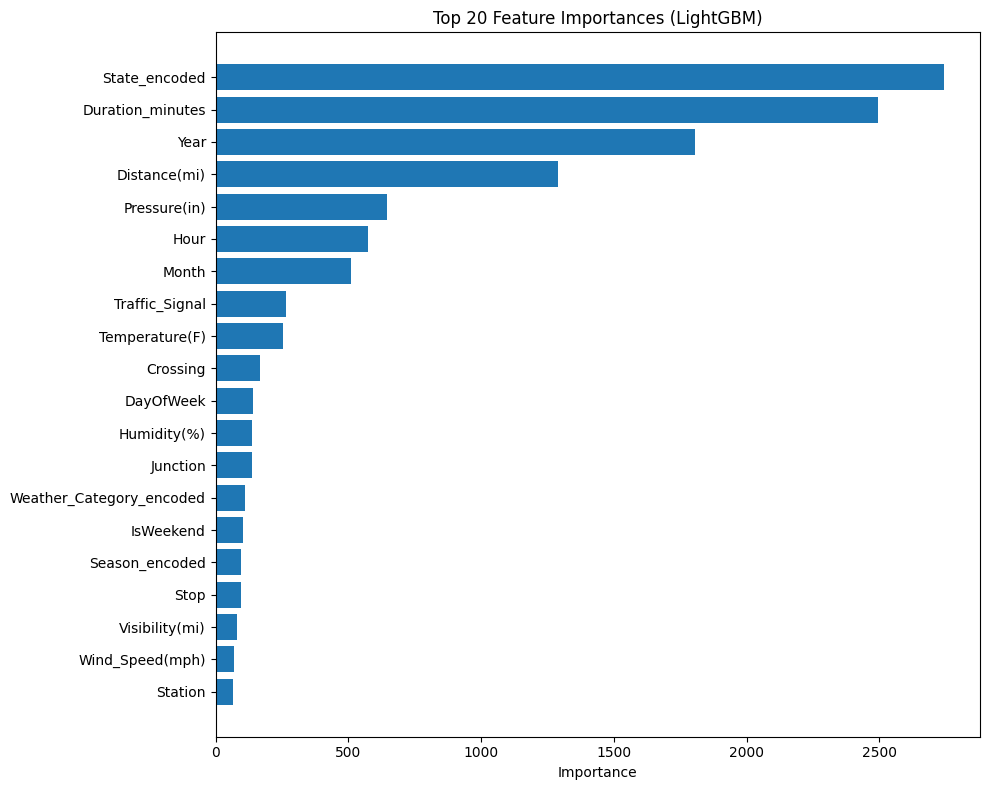

In [47]:
# ===========================
# Cell 14: 特徵重要性分析
# ===========================
if 'best_model' in globals() and hasattr(best_model, 'feature_importances_'):
    print("\n=== 特徵重要性分析 ===")
    
    # 取得特徵重要性
    importances = pd.DataFrame({
        'feature': selected_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # 顯示前20個重要特徵
    print("\nTop 20 重要特徵:")
    print(importances.head(20))
    
    # 視覺化
    plt.figure(figsize=(10, 8))
    top_n = 20
    plt.barh(importances.head(top_n)['feature'][::-1], 
             importances.head(top_n)['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Feature Importances ({best_model_name})')
    plt.tight_layout()
    plt.show()

In [48]:
# ===========================
# Cell 15: 儲存模型
# ===========================
def save_model_and_components(model, model_name, label_encoders, feature_names, output_dir='./model_output/'):
    """儲存模型和相關元件"""
    print(f"\n=== 儲存模型: {model_name} ===")
    
    # 建立輸出目錄
    os.makedirs(output_dir, exist_ok=True)
    
    # 儲存模型
    model_path = os.path.join(output_dir, f'{model_name.lower()}_model.pkl')
    joblib.dump(model, model_path)
    print(f"✅ 模型已儲存至: {model_path}")
    
    # 儲存標籤編碼器
    encoders_path = os.path.join(output_dir, 'label_encoders.pkl')
    joblib.dump(label_encoders, encoders_path)
    print(f"✅ 標籤編碼器已儲存至: {encoders_path}")
    
    # 儲存特徵名稱
    features_path = os.path.join(output_dir, 'feature_names.pkl')
    joblib.dump(feature_names, features_path)
    print(f"✅ 特徵名稱已儲存至: {features_path}")
    
    # 儲存模型資訊
    model_info = {
        'model_name': model_name,
        'n_features': len(feature_names),
        'feature_names': feature_names,
        'accuracy': results[model_name]['accuracy'],
        'f1_score': results[model_name]['f1'],
        'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }
    
    info_path = os.path.join(output_dir, 'model_info.json')
    import json
    with open(info_path, 'w') as f:
        json.dump(model_info, f, indent=4)
    print(f"✅ 模型資訊已儲存至: {info_path}")

# 儲存最佳模型
if 'best_model' in globals() and 'best_model_name' in globals():
    save_model_and_components(best_model, best_model_name, label_encoders, selected_features)



=== 儲存模型: LightGBM ===
✅ 模型已儲存至: ./model_output/lightgbm_model.pkl
✅ 標籤編碼器已儲存至: ./model_output/label_encoders.pkl
✅ 特徵名稱已儲存至: ./model_output/feature_names.pkl
✅ 模型資訊已儲存至: ./model_output/model_info.json


In [49]:
# ===========================
# Cell 16: 定義預測函數
# ===========================
def load_model_and_predict(model_path, encoders_path, features_path, input_data):
    """載入模型並進行預測"""
    print("\n=== 載入模型並預測 ===")
    
    # 載入模型和元件
    model = joblib.load(model_path)
    label_encoders = joblib.load(encoders_path)
    feature_names = joblib.load(features_path)
    
    print(f"✅ 模型載入成功")
    print(f"   特徵數量: {len(feature_names)}")
    
    # 檢查輸入資料
    missing_features = [f for f in feature_names if f not in input_data]
    if missing_features:
        print(f"❌ 缺少以下特徵: {missing_features}")
        return None
    
    # 準備特徵向量
    X_new = pd.DataFrame([input_data])[feature_names]
    
    # 進行預測
    prediction = model.predict(X_new)[0]
    prediction_proba = model.predict_proba(X_new)[0]
    
    # 轉換回原始的嚴重度級別
    severity_level = prediction + 1
    
    print(f"\n預測結果:")
    print(f"🚨 嚴重度級別: {severity_level}")
    print(f"\n各級別機率:")
    for i, prob in enumerate(prediction_proba):
        bar = '█' * int(prob * 20)
        print(f"  級別 {i+1}: {prob:6.2%} {bar}")
    
    return severity_level, prediction_proba

In [50]:
# 範例預測（取消註解以使用）
# example_input = {
#     'Temperature(F)': 70.0,
#     'Humidity(%)': 80.0,
#     'Pressure(in)': 29.95,
#     'Visibility(mi)': 10.0,
#     'Wind_Speed(mph)': 5.0,
#     'Distance(mi)': 1.0,
#     'Hour': 14,
#     'DayOfWeek': 1,
#     'Month': 6,
#     'Year': 2023,
#     'IsWeekend': 0,
#     'Duration_minutes': 30.0,
#     # ... 其他編碼後的特徵
# }
# 
# severity, proba = load_model_and_predict(
#     './model_output/random_forest_model.pkl',
#     './model_output/label_encoders.pkl',
#     './model_output/feature_names.pkl',
#     example_input
# )

print("\n✅ 完成! 模型訓練和儲存成功。")
print("   您可以使用 load_model_and_predict 函數來進行新的預測。")


✅ 完成! 模型訓練和儲存成功。
   您可以使用 load_model_and_predict 函數來進行新的預測。
